<h1><center>IF3270 - Pembelajaran Mesin</center></h1><h2><center>Tugas Besar IIB : Implementasi Agglomerative</center></h2><hr>
<h3>Anggota Kelompok</h3>

<ol>
    <li> 13517028 - Muhammad Akmal
    <li> 13517052 - Haris Salman Al-Ghifary
    <li> 13517061 - Hafidh Rendyanto
    <li> 13517112 - Muhammad Nurdin Husen
</ol>


> Import Library

In [1]:
import numpy as np
import copy
import pandas as pd
import math
import random
import itertools
import performance as pm
import myAglomerative
import matplotlib.pyplot as plt
from sklearn import preprocessing

> Membaca dataset

In [2]:
iris = pd.read_csv('data/Iris.csv')       #load data dari file csv
pd.set_option('display.max_rows', None)   #menset agar max_rows tidak di display
iris_process = iris.iloc[:,1:5]           #membuang properti id dan label untuk keperluan training
iris_label = iris.iloc[:,5]

<h3><center> Melakukan model pembelajaran dengan algoritma Aglomerative</center></h3>

In [3]:
single = myAglomerative.Aglomerative(iris_process, "single")    #model single linkage
complete = myAglomerative.Aglomerative(iris_process, "complete")  #model complete linkage
average = myAglomerative.Aglomerative(iris_process, "average")  #model average linkage
average_group = myAglomerative.Aglomerative(iris_process, "average_group")  #model average linkage

> Melakukan *clustering* dengan jumlah *cluster* = 3

In [4]:
singleCluster = pd.DataFrame(data=single.get_result_by_number_of_cluster(3),columns=["Cluster(Single-Lingkage)"])
completeCluster = pd.DataFrame(data=complete.get_result_by_number_of_cluster(3),columns=["Cluster(Complete-Lingkage)"])
averageCluster = pd.DataFrame(data=average.get_result_by_number_of_cluster(3),columns=["Cluster(Average-Lingkage)"])
averageGroupCluster = pd.DataFrame(data=average_group.get_result_by_number_of_cluster(3),columns=["Cluster(AverageGroup-Lingkage)"])
cluster = iris_process.join(iris_label)

> Mengubah *cluster* menjadi label yang bersesuaian. <br>
> Akan dicari kesesuaian antara *cluster* dengan label. <br>
> Misalkan, *cluster 0* setara dengan *label x*. <br>
> Proses pencarian dengan menghitung semua kemungkinan yang ada dan dipilih yang akurasinya maksimum. <br>

In [5]:
singleClustered,akurasiSingle = pm.convertCluster(cluster.join(singleCluster).to_numpy())
singleClustered = pd.DataFrame(data=singleClustered,columns=cluster.join(singleCluster).columns)

completeClustered,akurasiComplete = pm.convertCluster(cluster.join(completeCluster).to_numpy())
completeClustered = pd.DataFrame(data=completeClustered,columns=cluster.join(completeCluster).columns)

averageClustered,akurasiAverage = pm.convertCluster(cluster.join(averageCluster).to_numpy())
averageClustered = pd.DataFrame(data=averageClustered,columns=cluster.join(averageCluster).columns)

averageGroupClustered,akurasiAverageGroup = pm.convertCluster(cluster.join(averageGroupCluster).to_numpy())
averageGroupClustered = pd.DataFrame(data=averageGroupClustered,columns=cluster.join(averageGroupCluster).columns)

accuracy = pd.DataFrame(data=[["Single-Linkage",akurasiSingle],["Complete-Linkage",akurasiComplete],["Average-Linkage",akurasiAverage],["AverageGroup-Linkage",akurasiAverageGroup]],columns=['Linkage','Accuracy'])
accuracy

,Linkage,Accuracy
0,Single-Linkage,0.673333
1,Complete-Linkage,0.893333
2,Average-Linkage,0.900000
3,AverageGroup-Linkage,0.693333


In [6]:
cluster = cluster.join(singleClustered.iloc[:,-1]).join(completeClustered.iloc[:,-1]).join(averageClustered.iloc[:,-1]).join(averageGroupClustered.iloc[:,-1])
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster(Single-Lingkage),Cluster(Complete-Lingkage),Cluster(Average-Lingkage),Cluster(AverageGroup-Lingkage)
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


> Melakukan pengujian kualitas model secara **ektrinsik** menggunakan Fowlkes-Mallows Index <br>
> $FMI = TP/(\sqrt((TP+FP)*(TP+FN)))$

In [7]:
fmiSingle = pm.calculateFMI(singleClustered.to_numpy())               #menghitung FMI untuk setiap klaster
fmiSingle = pd.DataFrame(data=fmiSingle, columns=['Cluster', 'FMI(Single-Linkage)'])  #mengkonversi menjadi data frame

fmiComplete = pm.calculateFMI(completeClustered.to_numpy())               #menghitung FMI untuk setiap klaster
fmiComplete = pd.DataFrame(data=fmiComplete, columns=['Cluster', 'FMI(Complete-Linkage)'])  #mengkonversi menjadi data frame

fmiAverage = pm.calculateFMI(averageClustered.to_numpy())               #menghitung FMI untuk setiap klaster
fmiAverage = pd.DataFrame(data=fmiAverage, columns=['Cluster', 'FMI(Average-Linkage)'])  #mengkonversi menjadi data frame

fmiAverageGroup = pm.calculateFMI(averageGroupClustered.to_numpy())               #menghitung FMI untuk setiap klaster
fmiAverageGroup = pd.DataFrame(data=fmiAverageGroup, columns=['Cluster', 'FMI(AverageGroup-Linkage)'])  #mengkonversi menjadi data frame

fmi = fmiSingle.join(fmiComplete.iloc[:,-1]).join(fmiAverage.iloc[:,-1]).join(fmiAverageGroup.iloc[:,-1])
fmi

,Cluster,FMI(Single-Linkage),FMI(Complete-Linkage),FMI(Average-Linkage),FMI(AverageGroup-Linkage)
0,Iris-setosa,1.00,1.00,1.00,1.00
1,Iris-versicolor,0.71,0.87,0.87,0.28
2,Iris-virginica,0.14,0.82,0.84,0.72
3,Rata-rata,0.62,0.90,0.90,0.67


> Melakukan pengujian kualitas model secara **intrinsik** menggunakan koefisien silhoutte <br>
> $SillhoutteCoef = (b-a)/(max(a,b))$ <br>
> a : jarak rata-rata objek dengan objek lain *dalam satu klaster*<br>
> b : jarak rata-rata objek dengan objek lain *pada inter-klaster terdekat*

In [8]:
single_with_cluster = singleClustered.iloc[:,0:4].join(singleClustered.iloc[:,-1])#mengambil hanya properti data dan clasternya
singleSilhoutte = pm.calculateSilhoutte(single_with_cluster.to_numpy())                 #menghitung silhoutte coef untuk setiap objek
singleSilhoutte = pd.DataFrame(data=singleSilhoutte,columns=['Silhoutte(Single)'])             #mengkonversi ke data frame

complete_with_cluster = completeClustered.iloc[:,0:4].join(completeClustered.iloc[:,-1])#mengambil hanya properti data dan clasternya
completeSilhoutte = pm.calculateSilhoutte(complete_with_cluster.to_numpy())                 #menghitung silhoutte coef untuk setiap objek
completeSilhoutte = pd.DataFrame(data=completeSilhoutte,columns=['Silhoutte(complete)'])             #mengkonversi ke data frame

average_with_cluster = averageClustered.iloc[:,0:4].join(averageClustered.iloc[:,-1])#mengambil hanya properti data dan clasternya
averageSilhoutte = pm.calculateSilhoutte(average_with_cluster.to_numpy())                 #menghitung silhoutte coef untuk setiap objek
averageSilhoutte = pd.DataFrame(data=averageSilhoutte,columns=['Silhoutte(Average)'])             #mengkonversi ke data frame

averageGroup_with_cluster = averageGroupClustered.iloc[:,0:4].join(averageGroupClustered.iloc[:,-1])#mengambil hanya properti data dan clasternya
averageGroupSilhoutte = pm.calculateSilhoutte(averageGroup_with_cluster.to_numpy())                 #menghitung silhoutte coef untuk setiap objek
averageGroupSilhoutte = pd.DataFrame(data=averageGroupSilhoutte,columns=['Silhoutte(AverageGroup)'])             #mengkonversi ke data frame

cluster.join(singleSilhoutte).join(completeSilhoutte).join(averageSilhoutte).join(averageGroupSilhoutte)                                                #menambahkan kolom silhoutte ke data terklaster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster(Single-Lingkage),Cluster(Complete-Lingkage),Cluster(Average-Lingkage),Cluster(AverageGroup-Lingkage),Silhoutte(Single),Silhoutte(complete),Silhoutte(Average),Silhoutte(AverageGroup)
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.847881,0.849129,0.847139,0.777470
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.804512,0.811936,0.809332,0.694455
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.816449,0.825148,0.822853,0.725643
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.785471,0.799469,0.796687,0.669140
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.841573,0.843967,0.841941,0.771729
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.751028,0.743868,0.740514,0.654157
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.807936,0.818245,0.815862,0.718814
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.847687,0.850935,0.848886,0.771749
8,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.721751,0.744327,0.740904,0.573577
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,0.819761,0.826671,0.824216,0.717806


In [9]:
singleSilhoutte.mean()

Silhoutte(Single)    0.363093
dtype: float64

In [10]:
completeSilhoutte.mean()

Silhoutte(complete)    0.545918
dtype: float64

In [11]:
averageSilhoutte.mean()

Silhoutte(Average)    0.549573
dtype: float64

In [12]:
averageGroupSilhoutte.mean()

Silhoutte(AverageGroup)    0.484455
dtype: float64

<h3><center>VISUALISASI</center></h3>

> Data Preprocessing

In [13]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)
for i in range(5,8):
    cluster.iloc[:,i] = le.fit_transform(cluster.iloc[:,i])

> **Awal**

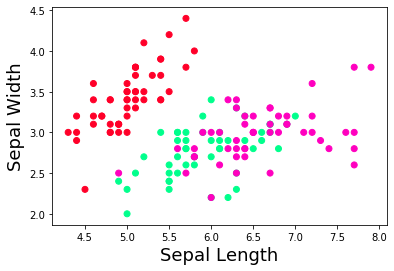

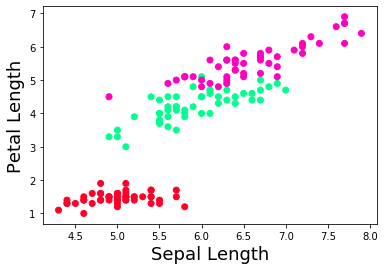

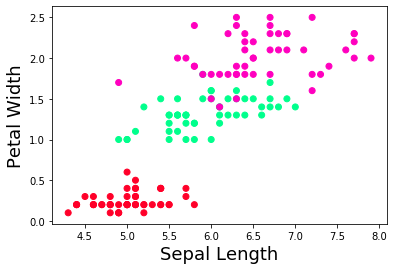

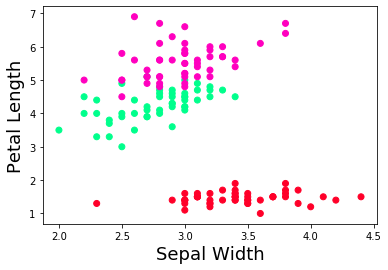

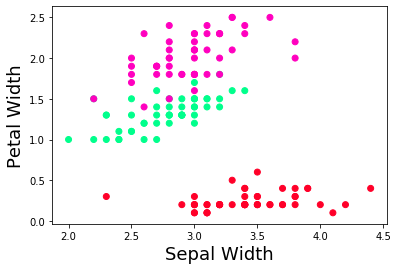

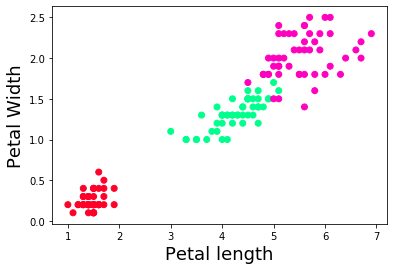

In [14]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=iris.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

> Single-Linkage

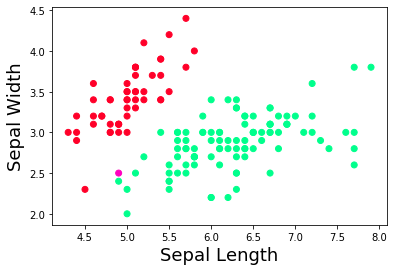

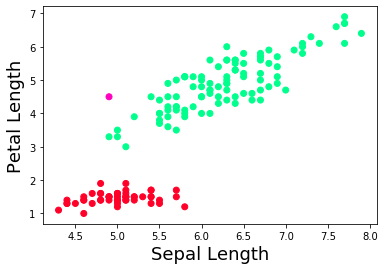

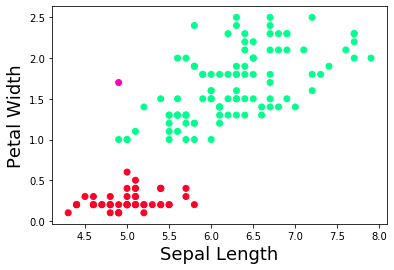

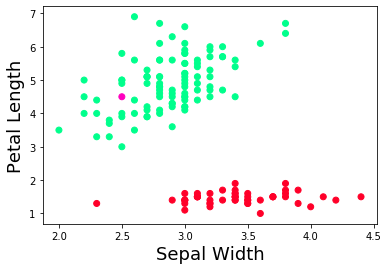

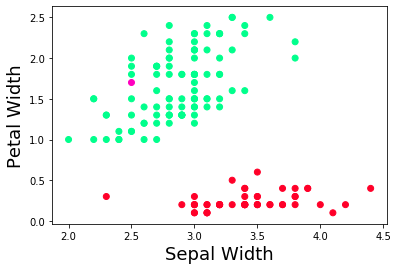

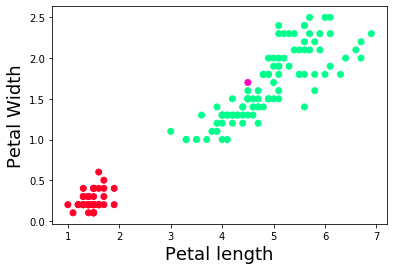

In [15]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=cluster.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=cluster.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=cluster.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=cluster.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=cluster.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=cluster.iloc[:,5], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

> Complete Linkage

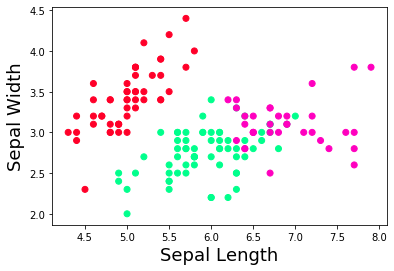

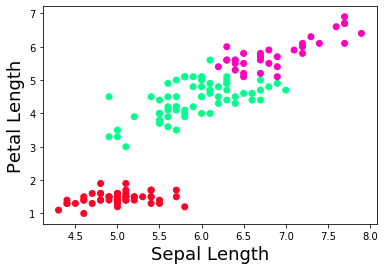

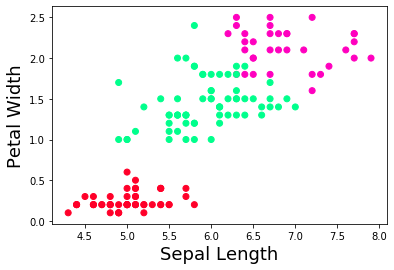

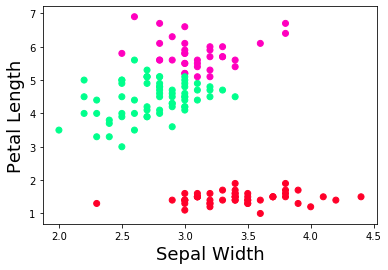

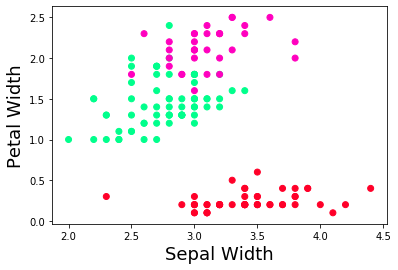

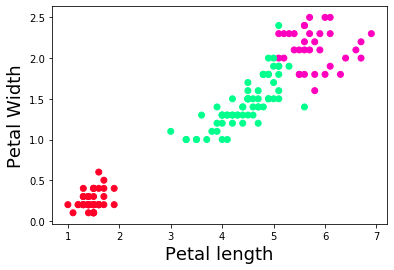

In [16]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=cluster.iloc[:,6], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=cluster.iloc[:,6], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=cluster.iloc[:,6], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=cluster.iloc[:,6], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=cluster.iloc[:,6], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=cluster.iloc[:,6], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

> Average-Linkage

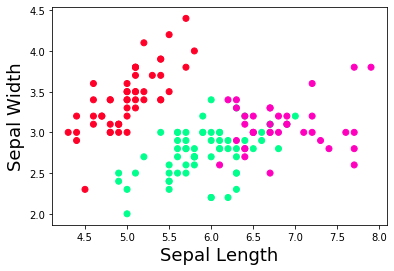

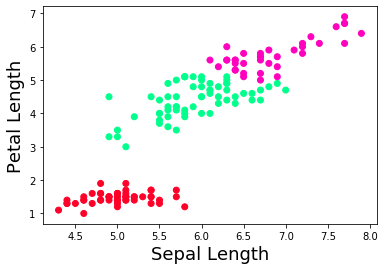

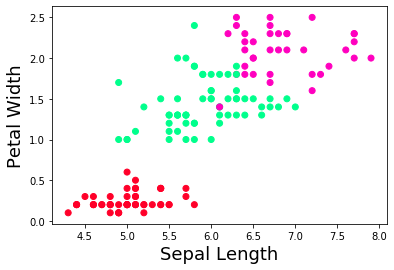

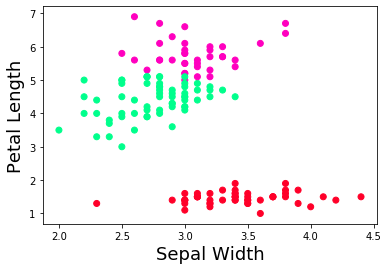

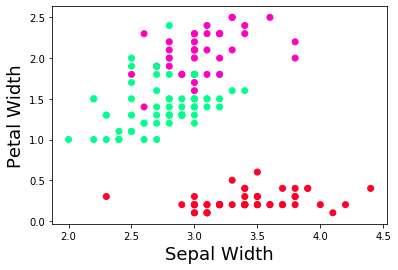

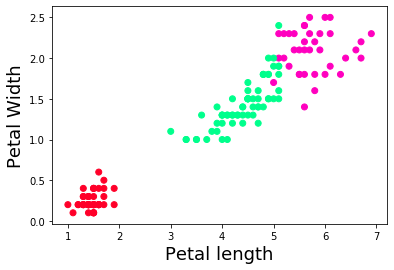

In [17]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=cluster.iloc[:,7], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=cluster.iloc[:,7], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=cluster.iloc[:,7], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=cluster.iloc[:,7], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=cluster.iloc[:,7], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=cluster.iloc[:,7], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

> AverageGroup - Linkage

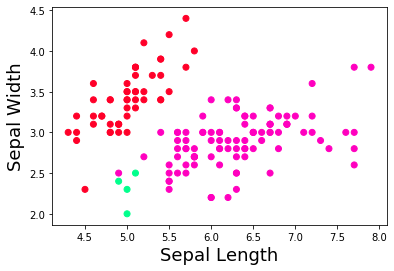

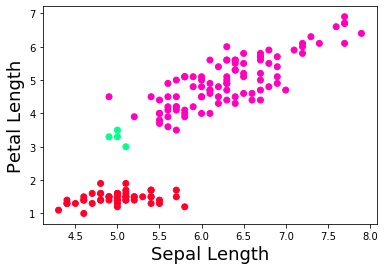

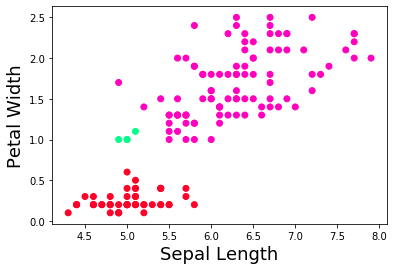

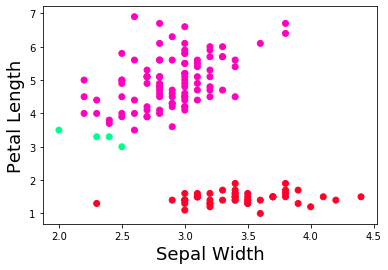

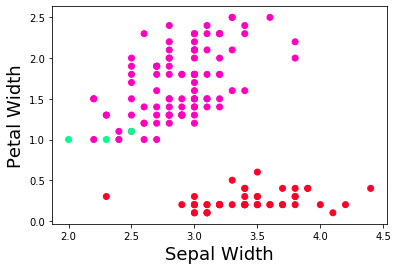

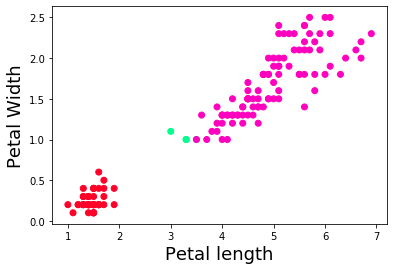

In [37]:
ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=cluster.iloc[:,8], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=cluster.iloc[:,8], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=cluster.iloc[:,8], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=cluster.iloc[:,8], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=cluster.iloc[:,8], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

ax = plt.subplot()
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=cluster.iloc[:,8], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()